### ZIP files 
работа с архивами

Архивация файлов — упаковка нескольких файлов в один файл или поток — архив. Не следует путать архивацию со сжатием, которое далеко не всегда применяется при создании архива.

Архивный файл – это специальным образом организованный файл, содержащий в себе один или несколько файлов в сжатом или несжатом виде и служебную информацию об именах файлов, дате и времени их создания или модификации, размерах и т.д.

Сжатие информации в файлах производится за счет устранения избыточности различными способами, например, за счет упрощения кодов, исключения из них постоянных битов или представления повторяющихся символов или повторяющейся последовательности символов в виде коэффициента повторения и соответствующих символов.

Степень сжатия файлов характеризуется коэффициентом K, определяемым как отношение объема сжатого файла V к объему исходного файла V , выраженным в процентах:

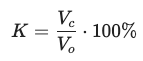

Степень сжатия зависит от используемой программы, метода сжатия и типа исходного файла. Наиболее хорошо сжимаются файлы графических образов, текстовые файлы и файлы данных, для которых степень сжатия может достигать 
5−40%, меньше сжимаются файлы исполняемых программ и загрузочных модулей –
60−90%. Почти не сжимаются архивные файлы.



1) Посмотреть файлы в архиве zip

In [1]:
from zipfile import ZipFile
zip_file_name = '/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/test.zip'

ZipFile(zip_file_name).infolist()

[<ZipInfo filename='test/' external_attr=0x10>,
 <ZipInfo filename='test/Картинки/' external_attr=0x10>,
 <ZipInfo filename='test/Картинки/1.jpg' compress_type=deflate external_attr=0x20 file_size=90156 compress_size=84676>,
 <ZipInfo filename='test/Картинки/avatar.png' external_attr=0x20 file_size=19053>,
 <ZipInfo filename='test/Картинки/certificate.png' compress_type=deflate external_attr=0x20 file_size=43699 compress_size=43532>,
 <ZipInfo filename='test/Картинки/py.png' compress_type=deflate external_attr=0x20 file_size=33522 compress_size=33443>,
 <ZipInfo filename='test/Картинки/World_Time_Zones_Map.png' compress_type=deflate external_attr=0x20 file_size=2324421 compress_size=2322032>,
 <ZipInfo filename='test/Картинки/Снимок экрана.png' compress_type=deflate external_attr=0x20 file_size=10878 compress_size=10614>,
 <ZipInfo filename='test/Неравенства.djvu' external_attr=0x20 file_size=5283010>,
 <ZipInfo filename='test/Программы/' external_attr=0x10>,
 <ZipInfo filename='test/П

In [2]:
with ZipFile(zip_file_name) as zip_file:
    info = zip_file.infolist()
    print(info[6].file_size)                # размер начального файла в байтах
    print(info[6].compress_size)            # размер сжатого файла в байтах
    print(info[6].filename)                 # имя файла
    print(info[6].date_time)                # дата изменения файла

2324421
2322032
test/Картинки/World_Time_Zones_Map.png
(2021, 11, 8, 7, 30, 6)


Посмотреть содержимое zip  в виде таблицы (удобнее)

In [3]:
with ZipFile(zip_file_name) as zip_file:
    zip_file.printdir()

File Name                                             Modified             Size
test/                                          2021-11-27 12:47:10            0
test/Картинки/                                 2021-11-27 12:49:02            0
test/Картинки/1.jpg                            2021-09-02 12:30:20        90156
test/Картинки/avatar.png                       2021-08-20 09:38:44        19053
test/Картинки/certificate.png                  2021-10-23 09:46:36        43699
test/Картинки/py.png                           2021-07-28 17:55:56        33522
test/Картинки/World_Time_Zones_Map.png         2021-11-08 07:30:06      2324421
test/Картинки/Снимок экрана.png                2021-10-01 20:47:02        10878
test/Неравенства.djvu                          2021-08-19 08:39:06      5283010
test/Программы/                                2021-11-27 12:48:20            0
test/Программы/image_util.py                   2021-11-18 12:42:22         4955
test/Программы/sort.py                  

При создании объекта ZipFile мы также можем передать необязательный аргумент mode, который задает режим работы (по аналогии с обычными файлами):

        r — файл будет открыт для чтения
        w — если файл существует, то он будет уничтожен и вместо него будет создан новый файл
        a — существующий файл будет открыт в режиме добавления в конец

метод is_dir(), чтобы проверить тип объекта: файл или папка.

In [5]:
with ZipFile(zip_file_name) as zip_file:
    info = zip_file.infolist()
    print(info[0].is_dir())
    print(info[6].is_dir())

True
False


Посмотреть только названия файлов в архиве

In [6]:
from zipfile import ZipFile

with ZipFile(zip_file_name) as zip_file:
    info = zip_file.namelist()
    print(*info, sep='\n')

test/
test/Картинки/
test/Картинки/1.jpg
test/Картинки/avatar.png
test/Картинки/certificate.png
test/Картинки/py.png
test/Картинки/World_Time_Zones_Map.png
test/Картинки/Снимок экрана.png
test/Неравенства.djvu
test/Программы/
test/Программы/image_util.py
test/Программы/sort.py
test/Разные файлы/
test/Разные файлы/astros.json


метод getinfo() позволяет получить информацию о **КОНКРЕТНОМ ФАЙЛЕ** по его имени в архиве.

In [7]:
with ZipFile(zip_file_name) as zip_file:
    info = zip_file.namelist()                # получаем названия всех файлов архива
    last_file = zip_file.getinfo(info[-4])    # получаем информацию об отдельном файле
    print(last_file.file_size)
    print(last_file.compress_size)
    print(last_file.filename)
    print(last_file.date_time)

4955
1641
test/Программы/image_util.py
(2021, 11, 18, 12, 42, 22)


2) открытие конкретных файлов из архива

Метод ZipFile.open() открывает файл именно в бинарном виде, не в текстовом.


In [8]:
from zipfile import ZipFile

with ZipFile(zip_file_name) as zip_file:
    with zip_file.open('test/Разные файлы/astros.json') as file:
        print(file.read())

b'{"number": 10, "people": [{"craft": "ISS", "name": "Mark Vande Hei"}, {"craft": "ISS", "name": "Pyotr Dubrov"}, {"craft": "ISS", "name": "Thomas Pesquet"}, {"craft": "ISS", "name": "Megan McArthur"}, {"craft": "ISS", "name": "Shane Kimbrough"}, {"craft": "ISS", "name": "Akihiko Hoshide"}, {"craft": "ISS", "name": "Anton Shkaplerov"}, {"craft": "Shenzhou 13", "name": "Zhai Zhigang"}, {"craft": "Shenzhou 13", "name": "Wang Yaping"}, {"craft": "Shenzhou 13", "name": "Ye Guangfu"}], "message": "success"}'



Это бинарная строка. Метод file.read() возвращает сырые байты (тип bytes). Для того чтобы преобразовать их в строку (тип str), нужно использовать метод decode(), указав нужную кодировку (файл astros.json имеет кодировку UTF-8).

In [9]:
from zipfile import ZipFile

with ZipFile(zip_file_name) as zip_file:
    with zip_file.open('test/Разные файлы/astros.json') as file:
        print(file.read().decode('utf-8'))

{"number": 10, "people": [{"craft": "ISS", "name": "Mark Vande Hei"}, {"craft": "ISS", "name": "Pyotr Dubrov"}, {"craft": "ISS", "name": "Thomas Pesquet"}, {"craft": "ISS", "name": "Megan McArthur"}, {"craft": "ISS", "name": "Shane Kimbrough"}, {"craft": "ISS", "name": "Akihiko Hoshide"}, {"craft": "ISS", "name": "Anton Shkaplerov"}, {"craft": "Shenzhou 13", "name": "Zhai Zhigang"}, {"craft": "Shenzhou 13", "name": "Wang Yaping"}, {"craft": "Shenzhou 13", "name": "Ye Guangfu"}], "message": "success"}


In [10]:
import pandas as pd
with ZipFile(zip_file_name) as zip_file:
    with zip_file.open('test/Разные файлы/astros.json') as file:
        astros = pd.read_json(file)

astros

,number,people,message
0,10,"{'craft': 'ISS', 'name': 'Mark Vande Hei'}",success
1,10,"{'craft': 'ISS', 'name': 'Pyotr Dubrov'}",success
2,10,"{'craft': 'ISS', 'name': 'Thomas Pesquet'}",success
3,10,"{'craft': 'ISS', 'name': 'Megan McArthur'}",success
4,10,"{'craft': 'ISS', 'name': 'Shane Kimbrough'}",success
5,10,"{'craft': 'ISS', 'name': 'Akihiko Hoshide'}",success
6,10,"{'craft': 'ISS', 'name': 'Anton Shkaplerov'}",success
7,10,"{'craft': 'Shenzhou 13', 'name': 'Zhai Zhigang'}",success
8,10,"{'craft': 'Shenzhou 13', 'name': 'Wang Yaping'}",success
9,10,"{'craft': 'Shenzhou 13', 'name': 'Ye Guangfu'}",success


3) Запись 

Запись в zip архив

По аналогии с чтением файлов из архива их можно туда и записывать, для этого необходимо создать объект ZipFile в режимах mode='w' или mode='a'.

In [11]:
from zipfile import ZipFile

with ZipFile('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/archive.zip', mode='w') as zip_file:
    zip_file.write('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data_merge.json')
    zip_file.write('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/test_file.txt')
    print(zip_file.namelist())

['Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data_merge.json', 'Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/test_file.txt']


In [ ]:
# Метод write() может принимать еще один строковый аргумент, задающий новое имя файла в архиве.


from zipfile import ZipFile

with ZipFile('archive.zip', mode='w') as zip_file:
    zip_file.write('program.py', 'new_program.py')  # первый аргумент - это имя файла
    zip_file.write('lse.jpeg', 'lse1.jpeg')         # второй аргумент - это имя файла в архиве
    print(zip_file.namelist())                      

Все файлы ДОЛЖНЫ ЛЕЖАТЬ В ОДНОЙ ПАПКЕ для корректной записи

In [3]:
# Для добавления файлов в уже существующий архив необходимо создать объект ZipFile в режиме mode='a'.


from zipfile import ZipFile

with ZipFile('test.zip', mode='a') as zip_file:
    zip_file.write('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/cyrillic.txt', 
                   'test/cyr.txt')
    zip_file.write('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/transliteration.txt')
    print(*zip_file.namelist(), sep='\n')

test/cyr.txt
Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/transliteration.txt
test/cyr.txt
Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/transliteration.txt


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/zipfile.py:1517: UserWarning: Duplicate name: 'test/cyr.txt'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/zipfile.py:1517: UserWarning: Duplicate name: 'Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/transliteration.txt'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


4) извлечь файлы в каталог

In [4]:
from zipfile import ZipFile

zip_file_name = '/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/test_new.zip'

with ZipFile(zip_file_name) as zip_file:
    zip_file.extract('test/Картинки/avatar.png')
    zip_file.extract('test/Программы/image_util.py')
    zip_file.extract('lse.jpeg')

Если требуется извлечь все содержимое архива, то используется метод extractall(), он принимает в качестве аргумента путь, по которому требуется извлечь все файлы. Если путь не указывать, то файл будет извлечен в папку, где находится файл с программой.

In [5]:
from zipfile import ZipFile

with ZipFile(zip_file_name) as zip_file:
    zip_file.extractall('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data')

5) Примечание. При создании объекта ZipFile мы также можем передать еще два необязательных аргумента:

        compression, который определяет метод сжатия, который должен использоваться при записи в архив. Он принимает одно из значений: ZIP_STORED, ZIP_DEFLATED, ZIP_BZIP2, ZIP_LZMA. По умолчанию используется значение compression=ZIP_STORED

        allowZip64, который позволяет разрешить использование расширений zip64, которые дают возможность создавать архивы размером больше 4 гигабайт. По умолчанию равен allowZip64=False

6) Примечание . Для того чтобы проверить является ли некоторый файл zip архивом, используется функция zipfile.is_zipfile(), которая принимает на вход путь к файлу (или сам файловый объект) и возвращает значение True, если указанный файл является zip архивом, или False в противном случае.

### Задачи на ZIP

        Сколько файлов в ZIP (не считая папок)

In [12]:
import pandas as pd
with ZipFile('/Users/tony_builder/Downloads/workbook.zip') as zip_file:
    zip_file.printdir()



File Name                                             Modified             Size
books/                                         2021-11-30 21:06:14            0
books/how to prove.pdf                         2021-11-30 13:27:36       660617
data_sets/                                     2021-11-30 21:06:08            0
data_sets/countries.json                       2021-11-30 19:42:40           22
data_sets/data_sample.csv                      2021-11-30 19:41:58           15
data_sets/fontlist-v330.json                   2021-11-19 10:53:12        96401
data_sets/readme.txt                           2021-11-30 20:16:56           14
data_sets/task_results.xlsx                    2021-11-30 20:21:32        13420
earth.jpg                                      2021-11-30 20:15:26       335250
games/                                         2021-11-30 21:05:48            0
games/Hollow Knight Silksong.exe               2013-08-22 08:20:06       805992
images/                                 

In [20]:
# посчитать число папок в архиве
with ZipFile('/Users/tony_builder/Downloads/workbook.zip') as zip_file:
    info = zip_file.infolist()
    print(sum([(file.is_dir()) for file in info]))  # меняем каждую строку на булево значение папка/не папка
                                                    # и считаем сумму True
    

7


In [23]:
# посчитать число файлов в архиве (НЕ ПАПОК)
with ZipFile('/Users/tony_builder/Downloads/workbook.zip') as zip_file:
    info = zip_file.infolist()

print(len(info) - 
      sum([(file.is_dir()) for file in info]))

18


        Объем файлов
        Вам доступен архив workbook.zip, содержащий различные папки и файлы. Напишите программу, которая выводит суммарный объем файлов этого архива в сжатом и не сжатом видах в байтах, в следующем формате:

        Объем исходных файлов: <объем до сжатия> байт(а)
        Объем сжатых файлов: <объем после сжатия> байт(а)

In [40]:
# удобный способ создать датасет на основе infolist для zip файла (об имени, размере, дате изменения)
import pandas as pd

with ZipFile('/Users/tony_builder/Downloads/workbook.zip', 'r') as zip:
    info_list = zip.infolist()
    data = []
    for info in info_list:
        data.append({'filename': info.filename,
                     'real_size': info.file_size,
                     'compress_size' : info.compress_size,
                     'date_modified': pd.Timestamp(*info.date_time),
                     'is_file' : int(info.file_size !=0)})
    zip_info_df = pd.DataFrame(data)

zip_info_df


,filename,real_size,compress_size,date_modified,is_file
0,books/,0,0,2021-11-30 21:06:14,0
1,books/how to prove.pdf,660617,654933,2021-11-30 13:27:36,1
2,data_sets/,0,0,2021-11-30 21:06:08,0
3,data_sets/countries.json,22,22,2021-11-30 19:42:40,1
4,data_sets/data_sample.csv,15,15,2021-11-30 19:41:58,1
5,data_sets/fontlist-v330.json,96401,4803,2021-11-19 10:53:12,1
6,data_sets/readme.txt,14,14,2021-11-30 20:16:56,1
7,data_sets/task_results.xlsx,13420,11039,2021-11-30 20:21:32,1
8,earth.jpg,335250,330037,2021-11-30 20:15:26,1
9,games/,0,0,2021-11-30 21:05:48,0


In [34]:
zip_info_df.dtypes

filename                 object
size                      int64
date_modified    datetime64[ns]
is_file                   int64
dtype: object

Теперь выведем суммарный объем файлов до сжатия и после сжатия

In [39]:
zip_info_df

,filename,size,compress_size,date_modified,is_file
0,books/,0,0,2021-11-30 21:06:14,0
1,books/how to prove.pdf,660617,654933,2021-11-30 13:27:36,1
2,data_sets/,0,0,2021-11-30 21:06:08,0
3,data_sets/countries.json,22,22,2021-11-30 19:42:40,1
4,data_sets/data_sample.csv,15,15,2021-11-30 19:41:58,1
5,data_sets/fontlist-v330.json,96401,4803,2021-11-19 10:53:12,1
6,data_sets/readme.txt,14,14,2021-11-30 20:16:56,1
7,data_sets/task_results.xlsx,13420,11039,2021-11-30 20:21:32,1
8,earth.jpg,335250,330037,2021-11-30 20:15:26,1
9,games/,0,0,2021-11-30 21:05:48,0


In [41]:
print(f'Объем исходных файлов: {zip_info_df.real_size.sum()} байт(а)')
print(f'Объем сжатых файлов: {zip_info_df.compress_size.sum()} байт(а)')


Объем исходных файлов: 17118701 байт(а)
Объем сжатых файлов: 15693720 байт(а)


        Наилучший показатель
        Вам доступен архив workbook.zip, содержащий различные папки и файлы. Напишите программу, которая выводит название файла из этого архива, который имеет наилучший показатель степени сжатия.

In [66]:
from zipfile import ZipFile
import pandas as pd

with ZipFile('/Users/tony_builder/Downloads/workbook.zip', 'r') as zip:
    info_list = zip.infolist()
    data = []
    for info in info_list:
        data.append({'filename': info.filename,
                     'real_size': info.file_size,
                     'compress_size' : info.compress_size,
                     'date_modified': pd.Timestamp(*info.date_time),
                     'is_file' : int(info.file_size !=0)})
    zip_info_df = pd.DataFrame(data)
    
zip_info_df['compression_ratio'] = (zip_info_df.compress_size/ zip_info_df.real_size * 100).round(2).fillna(0)



In [67]:
zip_info_df

,filename,real_size,compress_size,date_modified,is_file,compression_ratio
0,books/,0,0,2021-11-30 21:06:14,0,0.00
1,books/how to prove.pdf,660617,654933,2021-11-30 13:27:36,1,99.14
2,data_sets/,0,0,2021-11-30 21:06:08,0,0.00
3,data_sets/countries.json,22,22,2021-11-30 19:42:40,1,100.00
4,data_sets/data_sample.csv,15,15,2021-11-30 19:41:58,1,100.00
5,data_sets/fontlist-v330.json,96401,4803,2021-11-19 10:53:12,1,4.98
6,data_sets/readme.txt,14,14,2021-11-30 20:16:56,1,100.00
7,data_sets/task_results.xlsx,13420,11039,2021-11-30 20:21:32,1,82.26
8,earth.jpg,335250,330037,2021-11-30 20:15:26,1,98.45
9,games/,0,0,2021-11-30 21:05:48,0,0.00


In [73]:
def take_name(filename):
    if filename.__contains__('/') and filename[-1] != '/':
        res = filename.split('/')[1]
    else: res = filename
    return res

In [79]:
files_df = zip_info_df.copy()
files_df['file_name'] = files_df.filename.apply(take_name)
files_df = files_df[['file_name', 'real_size', 'compress_size', 'date_modified', 'is_file',
       'compression_ratio']]. query('real_size !=0')

files_df

,file_name,real_size,compress_size,date_modified,is_file,compression_ratio
1,how to prove.pdf,660617,654933,2021-11-30 13:27:36,1,99.14
3,countries.json,22,22,2021-11-30 19:42:40,1,100.00
4,data_sample.csv,15,15,2021-11-30 19:41:58,1,100.00
5,fontlist-v330.json,96401,4803,2021-11-19 10:53:12,1,4.98
6,readme.txt,14,14,2021-11-30 20:16:56,1,100.00
7,task_results.xlsx,13420,11039,2021-11-30 20:21:32,1,82.26
8,earth.jpg,335250,330037,2021-11-30 20:15:26,1,98.45
10,Hollow Knight Silksong.exe,805992,494930,2013-08-22 08:20:06,1,61.41
12,code.jpeg,412414,410006,2021-11-30 13:18:26,1,99.42
13,stepik.png,11378,10294,2021-11-30 13:28:14,1,90.47


In [63]:
best_compressed_filename = zip_info_df[zip_info_df.real_size !=0]\
    .sort_values('compression_ratio').head(1).filename.values[0]

'data_sets/fontlist-v330.json'

        Вывести названия файлов из этого архива, которые были созданы или изменены позднее 2021-11-30 14:22:00. Названия файлов должны быть расположены в лексикографическом порядке, каждое на отдельной строке.

In [83]:
files_df[files_df.date_modified > '2021-11-30 14:22:00']\
    .sort_values('file_name').file_name.values

array(['countries.json', 'data_sample.csv', 'earth.jpg', 'exam.txt',
       'fipi_demo_2022.pdf', 'homework.py', 'python.pdf', 'readme.txt',
       'shopping_list.txt', 'task_results.xlsx'], dtype=object)

    Напишите программу, которая выводит названия всех файлов из этого архива в лексикографическом порядке, указывая для каждого его дату изменения, а также объем до и после сжатия, в следующем формате:

    <название файла>
      Дата модификации файла: <дата изменения>
      Объем исходного файла: <объем до сжатия> байт(а)
      Объем сжатого файла: <объем после сжатия> байт(а)
    Между данными о двух файлах должна располагаться пустая строка.

In [88]:
for index, row in files_df.sort_values('file_name').iterrows():
    print(f'{row.file_name}')
    print(f'  Дата модификации файла: {row.date_modified}')
    print(f'  Объем исходного файла: {row.real_size} байт(а)')
    print(f'  Объем сжатого файла: {row.compress_size} байт(а)')
    print()
    

Alexandra Savior – Crying All the Time.mp3
  Дата модификации файла: 2021-11-30 13:27:02
  Объем исходного файла: 5057559 байт(а)
  Объем сжатого файла: 5051745 байт(а)

Hollow Knight Silksong.exe
  Дата модификации файла: 2013-08-22 08:20:06
  Объем исходного файла: 805992 байт(а)
  Объем сжатого файла: 494930 байт(а)

Psychonauts 2.exe
  Дата модификации файла: 2013-08-22 08:20:06
  Объем исходного файла: 805992 байт(а)
  Объем сжатого файла: 494930 байт(а)

code.jpeg
  Дата модификации файла: 2021-11-30 13:18:26
  Объем исходного файла: 412414 байт(а)
  Объем сжатого файла: 410006 байт(а)

countries.json
  Дата модификации файла: 2021-11-30 19:42:40
  Объем исходного файла: 22 байт(а)
  Объем сжатого файла: 22 байт(а)

data_sample.csv
  Дата модификации файла: 2021-11-30 19:41:58
  Объем исходного файла: 15 байт(а)
  Объем сжатого файла: 15 байт(а)

earth.jpg
  Дата модификации файла: 2021-11-30 20:15:26
  Объем исходного файла: 335250 байт(а)
  Объем сжатого файла: 330037 байт(а)



In [89]:
# чисто для степика
answer_list = []
for index, row in files_df.sort_values('file_name').iterrows():
    answer_list.append(f'{row.file_name}')
    answer_list.append(f'  Дата модификации файла: {row.date_modified}')
    answer_list.append(f'  Объем исходного файла: {row.real_size} байт(а)')
    answer_list.append(f'  Объем сжатого файла: {row.compress_size} байт(а)')
    answer_list.append('')
    

In [91]:
print(*answer_list, sep='\n')

Alexandra Savior – Crying All the Time.mp3
  Дата модификации файла: 2021-11-30 13:27:02
  Объем исходного файла: 5057559 байт(а)
  Объем сжатого файла: 5051745 байт(а)

Hollow Knight Silksong.exe
  Дата модификации файла: 2013-08-22 08:20:06
  Объем исходного файла: 805992 байт(а)
  Объем сжатого файла: 494930 байт(а)

Psychonauts 2.exe
  Дата модификации файла: 2013-08-22 08:20:06
  Объем исходного файла: 805992 байт(а)
  Объем сжатого файла: 494930 байт(а)

code.jpeg
  Дата модификации файла: 2021-11-30 13:18:26
  Объем исходного файла: 412414 байт(а)
  Объем сжатого файла: 410006 байт(а)

countries.json
  Дата модификации файла: 2021-11-30 19:42:40
  Объем исходного файла: 22 байт(а)
  Объем сжатого файла: 22 байт(а)

data_sample.csv
  Дата модификации файла: 2021-11-30 19:41:58
  Объем исходного файла: 15 байт(а)
  Объем сжатого файла: 15 байт(а)

earth.jpg
  Дата модификации файла: 2021-11-30 20:15:26
  Объем исходного файла: 335250 байт(а)
  Объем сжатого файла: 330037 байт(а)



Вам доступен набор различных файлов, названия которых представлены в списке file_names. Также вам доступен архив files.zip. Дополните приведенный ниже код, чтобы он добавил в архив files.zip только те файлы из списка file_names, объем которых не превышает 
100 байт.

Примечание 1. Получить объем файла в байтах позволяет функция getsize() из модуля os.path. Данная функция принимает в качестве аргумента путь к файлу и возвращает размер указанного файла в байтах.

In [ ]:
import os.path

size = os.path.getsize('files.zip')     # узнать размер файла

In [ ]:
from zipfile import ZipFile

file_names = ['how to prove.pdf', 'fipi_demo_2022.pdf', 'Hollow Knight Silksong.exe',
              'code.jpeg', 'stepik.png', 'readme.txt', 'shopping_list.txt',
              'Alexandra Savior – Crying All the Time.mp3', 'homework.py', 'test.py']

with ZipFile('files.zip' , mode='a') as zip_file:
    for name in file_names:
        if os.path.getsize(name) < 100: 
            zip_file.write(name)

        Функция extract_this()
        Реализуйте функцию extract_this(), которая принимает один или более аргументов в следующем порядке:

        zip_name — название zip архива, например, data.zip
        *args — переменное количество позиционных аргументов, каждый из которых является названием некоторого файла
        Функция должна извлекать файлы *args из архива zip_name в папку с программой. Если в функцию не передано ни одного названия файла для извлечения, то функция должна извлечь все файлы из архива.

        Примечание 1. Например, следующий вызов функции

        extract_this('workbook.zip', 'earth.jpg', 'exam.txt')
        должен извлечь из архива workbook.zip файлы earth.jpg и exam.txt в папку с программой.

        Вызов функции

        extract_this('workbook.zip')
        должен извлечь из архива workbook.zip все файлы в папку с программой.

In [99]:
def extract_this(zip_name, *args):
    from zipfile import ZipFile
    with ZipFile(zip_name) as zip_file:
        if args ==(): zip_file.extractall()
        else:
            for name in args:
                zip_file.extract(name)
    

In [98]:
extract_this('some_arch.zip', 'religion.json', 'test_file.txt')

        Вам доступен архив data.zip, содержащий различные папки и файлы. Среди них есть несколько JSON файлов, каждый из которых содержит информацию о каком-либо футболисте:

        {
        "first_name": "Gary",
        "last_name": "Cahill",
        "team": "Chelsea",
        "position": "Defender"
        }
        У футболиста имеются следующие атрибуты: 

        first_name — имя
        last_name — фамилия
        team — название футбольного клуба
        position — игровая позиция
        Напишите программу, которая обрабатывает только данные JSON файлы и выводит имена и фамилии футболистов, выступающих за футбольный клуб Arsenal. Футболисты должны быть расположены в лексикографическом порядке имен, а при совпадении — в лексикографическом порядке фамилий, каждый на отдельной строке.

        Примечание 1. Обратите внимание, что наличие у файла расширения .json не гарантирует, что он является корректным текстовым файлом в формате JSON. Для того чтобы определить, является ли файл корректным текстовым файлом в формате JSON, воспользуйтесь конструкцией try-except и функцией is_correct_json() из предыдущего урока.

вспомогательная функция, которая позволяет считывать информацию о zip файле и записывать ее датасет

In [114]:
def show_zip_info(zip_file_name):
    from zipfile import ZipFile
    import pandas as pd

    with ZipFile(zip_file_name, 'r') as zip:
        info_list = zip.infolist()
    data = []
    for info in info_list:
        data.append({'filename': info.filename,
                     'real_size': info.file_size,
                     'compress_size' : info.compress_size,
                     'date_modified': pd.Timestamp(*info.date_time),
                     'is_file' : int(info.file_size !=0)})
    zip_info_df = pd.DataFrame(data)
    return zip_info_df

In [115]:
show_zip_info('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/data.zip')

,filename,real_size,compress_size,date_modified,is_file
0,another_folder/,0,0,2021-11-30 22:25:12,0
1,another_folder/FOLDER/,0,0,2021-11-30 22:24:56,0
2,another_folder/FOLDER/code.jpeg,412414,410006,2021-11-30 13:18:26,1
3,another_folder/FOLDER/player10.json,107,82,2021-11-30 22:22:18,1
4,another_folder/FOLDER/player11.json,120,91,2021-11-30 22:22:18,1
...,...,...,...,...,...
63,another_folder/FOLDER_HERE/stepik.json,11378,10335,2022-06-17 13:02:30,1
64,another_folder/FOLDER/emoji.json,50498,50010,2022-06-16 15:05:46,1
65,another_folder/FOLDER_HERE/ì«óδ⌐ ΓÑ¬ßΓ«óδ⌐ ñ«¬...,0,0,2022-06-17 13:04:06,0
66,folder/16 ¬«»¿∩.json,51073,50572,2022-06-16 15:05:46,1


In [119]:
zip_file = '/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/data.zip'
with ZipFile(zip_file, 'r') as zip:
        info_list = zip.infolist()

info_list

[<ZipInfo filename='another_folder/' external_attr=0x10>,
 <ZipInfo filename='another_folder/FOLDER/' external_attr=0x10>,
 <ZipInfo filename='another_folder/FOLDER/code.jpeg' compress_type=deflate external_attr=0x20 file_size=412414 compress_size=410006>,
 <ZipInfo filename='another_folder/FOLDER/player10.json' compress_type=deflate external_attr=0x20 file_size=107 compress_size=82>,
 <ZipInfo filename='another_folder/FOLDER/player11.json' compress_type=deflate external_attr=0x20 file_size=120 compress_size=91>,
 <ZipInfo filename='another_folder/FOLDER/player12.json' compress_type=deflate external_attr=0x20 file_size=119 compress_size=91>,
 <ZipInfo filename='another_folder/FOLDER/player13.json' compress_type=deflate external_attr=0x20 file_size=108 compress_size=81>,
 <ZipInfo filename='another_folder/FOLDER/player3.json' compress_type=deflate external_attr=0x20 file_size=108 compress_size=83>,
 <ZipInfo filename='another_folder/FOLDER/player4.json' compress_type=deflate external_at

Расширенная версия функции выше (позволяет считывать информацию о zip файле и записывать ее датасет)

  - дополнена тем, что , функция убирает все названия папок, оставляя только названия файлов

In [120]:
def show_zipfiles_info(zip_file_name):
    from zipfile import ZipFile
    import pandas as pd

    with ZipFile(zip_file_name, 'r') as zip:
        info_list = zip.infolist()
    data = []
    for info in info_list:
        data.append({'filename': info.filename,
                     'real_size': info.file_size,
                     'compress_size' : info.compress_size,
                     'date_modified': pd.Timestamp(*info.date_time),
                     'is_file' : int(info.file_size !=0)})
    zip_info_df = pd.DataFrame(data)

    def take_name(filename):
        if filename.__contains__('/') and filename[-1] != '/':
            res = filename.split('/')[-1]
        else: res = filename
        return res

    files_df = zip_info_df.copy()
    files_df['file_name'] = files_df.filename.apply(take_name)
    files_df = files_df[['file_name', 'real_size', 'compress_size', 'date_modified', 'is_file']]. \
        query('real_size !=0')

    return files_df

In [121]:
# посмотрим на все имена файлов, которые хранятся в архиве
zip_file = '/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/data.zip'
data_info_df = show_zipfiles_info(zip_file)
data_info_df

,file_name,real_size,compress_size,date_modified,is_file
2,code.jpeg,412414,410006,2021-11-30 13:18:26,1
3,player10.json,107,82,2021-11-30 22:22:18,1
4,player11.json,120,91,2021-11-30 22:22:18,1
5,player12.json,119,91,2021-11-30 22:22:18,1
6,player13.json,108,81,2021-11-30 22:22:18,1
...,...,...,...,...,...
62,Psychonauts 2.json,805992,502328,2022-06-17 13:02:14,1
63,stepik.json,11378,10335,2022-06-17 13:02:30,1
64,emoji.json,50498,50010,2022-06-16 15:05:46,1
66,16 ¬«»¿∩.json,51073,50572,2022-06-16 15:05:46,1


In [122]:
# отберем все имена файлов, причем только те, у которых расширение .json

json_files_list = [fname for fname in data_info_df.file_name.values if fname[-4:] == 'json']
json_files_list

['player10.json',
 'player11.json',
 'player12.json',
 'player13.json',
 'player3.json',
 'player4.json',
 'player5.json',
 'player6.json',
 'player1.json',
 'player14.json',
 'player15.json',
 'player22.json',
 'player29.json',
 'player36.json',
 'player43.json',
 'player50.json',
 'player7.json',
 'player8.json',
 'player17.json',
 'player18.json',
 'player24.json',
 'player25.json',
 'player31.json',
 'player32.json',
 'player38.json',
 'player39.json',
 'player45.json',
 'player46.json',
 'player19.json',
 'player20.json',
 'player21.json',
 'player26.json',
 'player27.json',
 'player28.json',
 'player34.json',
 'player35.json',
 'player40.json',
 'player41.json',
 'player42.json',
 'player47.json',
 'player48.json',
 'player49.json',
 'player16.json',
 'player2.json',
 'player23.json',
 'player30.json',
 'player37.json',
 'player44.json',
 'player51.json',
 'player9.json',
 'name_log.json',
 'python.json',
 'Psychonauts 2.json',
 'stepik.json',
 'emoji.json',
 '16 ¬«»¿∩.json',
 '1

Но нам в данном случае так не подходит - нужен полный путь до файла

Поэтому просто считаем список всех имен без функций напрямую из zip:

In [128]:
zip_file_name = '/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/data.zip'

with ZipFile(zip_file_name) as zip_file:
    json_files_list = [row.filename for row in zip_file.infolist() \
                       if row.filename[-4:] == 'json']

json_files_list # теперь у нас есть корректные пути к файлам

['another_folder/FOLDER/player10.json',
 'another_folder/FOLDER/player11.json',
 'another_folder/FOLDER/player12.json',
 'another_folder/FOLDER/player13.json',
 'another_folder/FOLDER/player3.json',
 'another_folder/FOLDER/player4.json',
 'another_folder/FOLDER/player5.json',
 'another_folder/FOLDER/player6.json',
 'another_folder/FOLDER_HERE/player1.json',
 'another_folder/FOLDER_HERE/player14.json',
 'another_folder/FOLDER_HERE/player15.json',
 'another_folder/FOLDER_HERE/player22.json',
 'another_folder/FOLDER_HERE/player29.json',
 'another_folder/FOLDER_HERE/player36.json',
 'another_folder/FOLDER_HERE/player43.json',
 'another_folder/FOLDER_HERE/player50.json',
 'another_folder/FOLDER_HERE/player7.json',
 'another_folder/FOLDER_HERE/player8.json',
 'another_folder/player17.json',
 'another_folder/player18.json',
 'another_folder/player24.json',
 'another_folder/player25.json',
 'another_folder/player31.json',
 'another_folder/player32.json',
 'another_folder/player38.json',
 'anot

In [138]:
# проверим все файлы на корректность
# вспомогательная функция, которая проверяет json файл на корректность
def is_correct_json_file(some_file):
    import json
    try:
        json.load(some_file)
        return True
    except: 
        return False



In [155]:
import json
with open('/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/data/another_folder/FOLDER/player10.json')\
    as file:
    smth = json.load(file)
    #pd.read_json(file, orient='index')

smth

{'first_name': 'Petr',
 'last_name': 'Cech',
 'team': 'Arsenal',
 'position': 'Goalkeeper'}

In [159]:
print(smth)

{'first_name': 'Petr', 'last_name': 'Cech', 'team': 'Arsenal', 'position': 'Goalkeeper'}


In [168]:
pd.DataFrame(smth, index=[0])

,first_name,last_name,team,position
0,Petr,Cech,Arsenal,Goalkeeper


In [ ]:
zip_file_name = '/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/data.zip'

from zipfile import ZipFile
with ZipFile(zip_file_name) as zip_file:
    for fname in json_files_list:
        zip_file.open(fname)

In [187]:
# создаем пустую табличку, в которую будем нагружать данные
temp_df = pd.DataFrame({'first_name': '', 'last_name': '', 'team': '', 'position': ''},
                       index=[0])

temp_df

,first_name,last_name,team,position
0,,,,


Тут по шагам:
1) открываем zip файл, назначаем начальный индекс
2) запускаем цикл по файлам, которыем имеют расширение json (см выше)
3) открываем этот файл json, пробуем загрузить информацию из него как из json 
- если получается - записываем данные из него в датасет с текущим индексом по итерации
- если не получается - пропускаем файл
4) добавляем полученный датасет к текущему
5) забираем результат только без первой строки (она пустая - см выше)

In [188]:

with ZipFile(zip_file_name) as zip_file:
    i=0
    for fname in json_files_list:
        i+=1
        with zip_file.open(fname) as file:
            try:
                smth = json.load(file)
                dfi =pd.DataFrame(smth, index=[i])
            except: continue
        temp_df = pd.concat([temp_df, dfi])
        

players_df= temp_df[1:]

In [190]:
players_df      # теперь у нас есть все игроки в таблице - можно с ними работать

,first_name,last_name,team,position
1,Petr,Cech,Arsenal,Goalkeeper
2,Kelechi,Iheanacho,Manchester City,Striker
3,Claudio,Bravo,Manchester City,Goalkeeper
4,Wes,Morgan,Leicester,Defender
5,Ryan,Shawcross,Stoke,Defender
6,Erik,Pieters,Stoke,Defender
7,Gael,Clichy,Manchester City,Defender
8,Phil,Jones,Manchester United,Defender
9,Kasper,Schmeichel,Leicester,Goalkeeper
10,Jamie,Vardy,Leicester,Striker


In [191]:
# а теперь все просто: сортировка по именам и фамилиям + фильтрация по клубу

players_df.sort_values(['first_name', 'last_name'])\
    [players_df.team == 'Arsenal']

/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_39866/1840125719.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  players_df.sort_values(['first_name', 'last_name'])\


,first_name,last_name,team,position
47,Alex,Iwobi,Arsenal,Midfielder 2
42,Alexis,Sanchez,Arsenal,Striker
25,Hector,Bellerin,Arsenal,Defender
41,Laurent,Koscielny,Arsenal,Defender
44,Mesut,Ozil,Arsenal,Midfielder 1
49,Olivier,Giroud,Arsenal,Striker
1,Petr,Cech,Arsenal,Goalkeeper
38,Theo,Walcott,Arsenal,Midfielder 2


In [195]:
players_list = [] # соберем сюда всех нужных нам игроков
for ind, row in players_df.sort_values(['first_name', 'last_name'])\
    [players_df.team == 'Arsenal'].iterrows():
    players_list.append(f'{row.first_name} {row.last_name}')

players_list

/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_39866/525424400.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for ind, row in players_df.sort_values(['first_name', 'last_name'])\


['Alex Iwobi',
 'Alexis Sanchez',
 'Hector Bellerin',
 'Laurent Koscielny',
 'Mesut Ozil',
 'Olivier Giroud',
 'Petr Cech',
 'Theo Walcott']

        Вывести структуру архива desktop.zip в виде

    test
      Картинки
        1.jpg 88 KB
        avatar.png 19 KB
        certificate.png 43 KB
        py.png 33 KB
        World_Time_Zones_Map.png 2 MB
        Снимок экрана.png 11 KB
      Неравенства.djvu 5 MB
      Программы
        image_util.py 5 KB
        sort.py 61 B
      Разные файлы
        astros.json 505 B

      Так как архив имеет собственную иерархию папок, каждый уровень вложенности должен быть выделен двумя пробелами.

In [196]:
test_zip = '/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/test.zip'
show_zipfiles_info(test_zip)

,file_name,real_size,compress_size,date_modified,is_file
2,1.jpg,90156,84676,2021-09-02 12:30:20,1
3,avatar.png,19053,19053,2021-08-20 09:38:44,1
4,certificate.png,43699,43532,2021-10-23 09:46:36,1
5,py.png,33522,33443,2021-07-28 17:55:56,1
6,World_Time_Zones_Map.png,2324421,2322032,2021-11-08 07:30:06,1
7,Снимок экрана.png,10878,10614,2021-10-01 20:47:02,1
8,Неравенства.djvu,5283010,5283010,2021-08-19 08:39:06,1
10,image_util.py,4955,1641,2021-11-18 12:42:22,1
11,sort.py,61,58,2021-11-14 19:31:02,1
13,astros.json,505,208,2021-11-08 09:29:58,1


In [202]:
test_zip_df = show_zip_info(test_zip)
test_zip_df

,filename,real_size,compress_size,date_modified,is_file
0,test/,0,0,2021-11-27 12:47:10,0
1,test/Картинки/,0,0,2021-11-27 12:49:02,0
2,test/Картинки/1.jpg,90156,84676,2021-09-02 12:30:20,1
3,test/Картинки/avatar.png,19053,19053,2021-08-20 09:38:44,1
4,test/Картинки/certificate.png,43699,43532,2021-10-23 09:46:36,1
5,test/Картинки/py.png,33522,33443,2021-07-28 17:55:56,1
6,test/Картинки/World_Time_Zones_Map.png,2324421,2322032,2021-11-08 07:30:06,1
7,test/Картинки/Снимок экрана.png,10878,10614,2021-10-01 20:47:02,1
8,test/Неравенства.djvu,5283010,5283010,2021-08-19 08:39:06,1
9,test/Программы/,0,0,2021-11-27 12:48:20,0


In [205]:
# освободимся от конечного слеша в названии
test_zip_df.filename= test_zip_df.filename.str.rstrip('/')
test_zip_df

,filename,real_size,compress_size,date_modified,is_file
0,test,0,0,2021-11-27 12:47:10,0
1,test/Картинки,0,0,2021-11-27 12:49:02,0
2,test/Картинки/1.jpg,90156,84676,2021-09-02 12:30:20,1
3,test/Картинки/avatar.png,19053,19053,2021-08-20 09:38:44,1
4,test/Картинки/certificate.png,43699,43532,2021-10-23 09:46:36,1
5,test/Картинки/py.png,33522,33443,2021-07-28 17:55:56,1
6,test/Картинки/World_Time_Zones_Map.png,2324421,2322032,2021-11-08 07:30:06,1
7,test/Картинки/Снимок экрана.png,10878,10614,2021-10-01 20:47:02,1
8,test/Неравенства.djvu,5283010,5283010,2021-08-19 08:39:06,1
9,test/Программы,0,0,2021-11-27 12:48:20,0


In [206]:
# посчитаем количество уровней (по числу слешей)
test_zip_df['levels'] = test_zip_df.filename.str.count('/')
test_zip_df

,filename,real_size,compress_size,date_modified,is_file,levels
0,test,0,0,2021-11-27 12:47:10,0,0
1,test/Картинки,0,0,2021-11-27 12:49:02,0,1
2,test/Картинки/1.jpg,90156,84676,2021-09-02 12:30:20,1,2
3,test/Картинки/avatar.png,19053,19053,2021-08-20 09:38:44,1,2
4,test/Картинки/certificate.png,43699,43532,2021-10-23 09:46:36,1,2
5,test/Картинки/py.png,33522,33443,2021-07-28 17:55:56,1,2
6,test/Картинки/World_Time_Zones_Map.png,2324421,2322032,2021-11-08 07:30:06,1,2
7,test/Картинки/Снимок экрана.png,10878,10614,2021-10-01 20:47:02,1,2
8,test/Неравенства.djvu,5283010,5283010,2021-08-19 08:39:06,1,1
9,test/Программы,0,0,2021-11-27 12:48:20,0,1


In [207]:
# вспомогательная фукнция для перевода байтов в одну из величин (кб, мб. гб)
def size_to(number):
    if len(str(number)) >= len(str(1024**3)): 
        res_numb = round(number/ 1024**3)   # гигабайты
        return f'{res_numb} GB'

    elif len(str(1024**2)) <= len(str(number)) < len(str(1024**3)): 
        res_numb = round(number/ 1024**2)   # мегабайты
        return f'{res_numb} MB'
    
    elif len(str(1024)) <= len(str(number)) < len(str(1024**2)): 
        res_numb = round(number/ 1024)   # килобайты
        return f'{res_numb} KB'
    
    else: 
        res_numb = number
        return f'{res_numb} B'

In [209]:
# добавим реальный размер в округленных единицах
test_zip_df['SIZE'] = test_zip_df.real_size.map(size_to)
test_zip_df

,filename,real_size,compress_size,date_modified,is_file,levels,SIZE
0,test,0,0,2021-11-27 12:47:10,0,0,0 B
1,test/Картинки,0,0,2021-11-27 12:49:02,0,1,0 B
2,test/Картинки/1.jpg,90156,84676,2021-09-02 12:30:20,1,2,88 KB
3,test/Картинки/avatar.png,19053,19053,2021-08-20 09:38:44,1,2,19 KB
4,test/Картинки/certificate.png,43699,43532,2021-10-23 09:46:36,1,2,43 KB
5,test/Картинки/py.png,33522,33443,2021-07-28 17:55:56,1,2,33 KB
6,test/Картинки/World_Time_Zones_Map.png,2324421,2322032,2021-11-08 07:30:06,1,2,2 MB
7,test/Картинки/Снимок экрана.png,10878,10614,2021-10-01 20:47:02,1,2,11 KB
8,test/Неравенства.djvu,5283010,5283010,2021-08-19 08:39:06,1,1,5 MB
9,test/Программы,0,0,2021-11-27 12:48:20,0,1,0 B


In [211]:
# уберем лишние столбцы
tzdf = test_zip_df[['filename','is_file','levels', 'SIZE']]
tzdf

,filename,is_file,levels,SIZE
0,test,0,0,0 B
1,test/Картинки,0,1,0 B
2,test/Картинки/1.jpg,1,2,88 KB
3,test/Картинки/avatar.png,1,2,19 KB
4,test/Картинки/certificate.png,1,2,43 KB
5,test/Картинки/py.png,1,2,33 KB
6,test/Картинки/World_Time_Zones_Map.png,1,2,2 MB
7,test/Картинки/Снимок экрана.png,1,2,11 KB
8,test/Неравенства.djvu,1,1,5 MB
9,test/Программы,0,1,0 B


In [213]:
tzdf.filename =  tzdf.filename.str.split('/')
tzdf

/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_39866/742629677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tzdf.filename =  tzdf.filename.str.split('/')


,filename,is_file,levels,SIZE
0,[test],0,0,0 B
1,"[test, Картинки]",0,1,0 B
2,"[test, Картинки, 1.jpg]",1,2,88 KB
3,"[test, Картинки, avatar.png]",1,2,19 KB
4,"[test, Картинки, certificate.png]",1,2,43 KB
5,"[test, Картинки, py.png]",1,2,33 KB
6,"[test, Картинки, World_Time_Zones_Map.png]",1,2,2 MB
7,"[test, Картинки, Снимок экрана.png]",1,2,11 KB
8,"[test, Неравенства.djvu]",1,1,5 MB
9,"[test, Программы]",0,1,0 B


In [215]:
for ind, row in tzdf.iterrows():
    print(f'{" "* 2 * row.levels}{row.filename[-1]} {row.SIZE * row.is_file}')
    

test 
  Картинки 
    1.jpg 88 KB
    avatar.png 19 KB
    certificate.png 43 KB
    py.png 33 KB
    World_Time_Zones_Map.png 2 MB
    Снимок экрана.png 11 KB
  Неравенства.djvu 5 MB
  Программы 
    image_util.py 5 KB
    sort.py 61 B
  Разные файлы 
    astros.json 505 B


Код, выстраивающий структуру zip-файла

In [2]:
# итак, соберем весь код один файл, напишем функцию!

# вспомогательная функция для перевода байтов в одну из величин (кб, мб. гб)
def size_to(number):
    if len(str(number)) >= len(str(1024**3)): 
        res_numb = round(number/ 1024**3)   # гигабайты
        return f'{res_numb} GB'

    elif len(str(1024**2)) <= len(str(number)) < len(str(1024**3)): 
        res_numb = round(number/ 1024**2)   # мегабайты
        return f'{res_numb} MB'
    
    elif len(str(1024)) <= len(str(number)) < len(str(1024**2)): 
        res_numb = round(number/ 1024)   # килобайты
        return f'{res_numb} KB'
    
    else: 
        res_numb = number
        return f'{res_numb} B'

# вспомогательная функция, которая выводит таблицу с информацией о zip-файле 
def show_zip_info(zip_file_name):
    from zipfile import ZipFile
    import pandas as pd

    with ZipFile(zip_file_name, 'r') as zip:
        info_list = zip.infolist()
    data = []
    for info in info_list:
        data.append({'filename': info.filename,
                     'real_size': info.file_size,
                     'compress_size' : info.compress_size,
                     'date_modified': pd.Timestamp(*info.date_time),
                     'is_file' : int(info.file_size !=0)})
    zip_info_df = pd.DataFrame(data)
    return zip_info_df

# основная функция
def zip_structure(zip_name):
    test_zip = zip_name
    test_zip_df = show_zip_info(test_zip)
    test_zip_df['temp']= test_zip_df.filename.str.rstrip('/')
    test_zip_df= test_zip_df.drop('filename', axis=1)\
                            .rename(columns={'temp': 'filename'})
    test_zip_df['levels'] = test_zip_df.filename.str.count('/')
    test_zip_df['SIZE'] = test_zip_df.real_size.map(size_to)
    tzdf = test_zip_df[['filename','is_file','levels', 'SIZE']]
    tzdf['temp'] =  tzdf.filename.str.split('/')
    tzdf = tzdf.drop('filename', axis=1)\
                .rename(columns={'temp': 'filename'})
    for ind, row in tzdf.iterrows():
        print(f'{" "* 2 * row.levels}{row.filename[-1]} {row.SIZE * row.is_file}')
    

In [3]:
s_tr = '/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/test.zip'
zip_structure(s_tr)

  cyr.txt 649 B
            transliteration.txt 429 B
  cyr.txt 649 B
            transliteration.txt 429 B


/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_64292/3503054986.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tzdf['temp'] =  tzdf.filename.str.split('/')


In [4]:
desktop_zip= '/Users/tony_builder/Documents/GitHub/studying/Python_stepic_beegeek/python for professional/data/desktop.zip'
zip_structure(desktop_zip)

fun 
  movies 
  songs 
    Alexandra Savior Crying All the Time.mp3 5 MB
games 
  not released 
    Hollow Knight Silksong.exe 787 KB
  Psychonauts 2.exe 787 KB
images 
  code.jpeg 403 KB
  stepik.png 11 KB
studying 
  books 
    how to prove.pdf 645 KB
  data_sets 
    countries.json 22 B
    data_sample.csv 15 B
    fonts 
      fontlist-v330.json 94 KB
    readme.txt 14 B
    task_results.xlsx 13 KB
  exam.txt 9 B
  fipi_demo_2022.pdf 666 KB
  homework.py 14 B
earth.jpg 327 KB
python.pdf 8 MB
shopping_list.txt 25 B
test.py 42 B


/var/folders/9t/0d2y6zvs0pn1b5hks81yn5jw0000gn/T/ipykernel_64292/3503054986.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tzdf['temp'] =  tzdf.filename.str.split('/')
